In [2033]:
# %matplotlib widget

In [2034]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2035]:
X, y = make_blobs(500, centers=2, cluster_std=1.4)
y[y == 0] = -1

In [2036]:
n_samples, n_features = X.shape
# w = np.random.randn(n_features)
# b = np.random.randn()
w = np.zeros(n_features)
b = 0

In [2037]:
LR = 0.01
REG_PARAM = 0.5
EPOCHS = 1000

In [2038]:
def decision_func(features: ndarray = X) -> ndarray:
    return np.dot(w, features.T) + b

In [2039]:
def loss() -> float:
        return np.mean(np.maximum(0, 1 - y * decision_func())) + REG_PARAM*np.sum(w**2)

In [2040]:
def get_grad(features: ndarray, labels: ndarray) -> tuple[float]:
    dL_dw = np.zeros(w.size)
    dL_db = 0

    for x_i, y_i in zip(features, labels):
        dist = int(1 - (y_i*np.dot(x_i, w)+b) > 0)
        dL_dw += w - REG_PARAM * x_i * y_i * dist
        # dL_db += -REG_PARAM * y_i * dist

    return dL_dw/labels.size, dL_db/labels.size

In [2041]:
def fit(batch_size: int = 32):
    for e in range(EPOCHS):
        print(f'Epoch {e}/{EPOCHS}, Loss: {loss()}{20*" "}', end='\r')
        global w, b

        batch_mask = np.random.choice(y.size, size=batch_size, replace=False)
        X_batch, y_batch = X[batch_mask], y[batch_mask]
        grad_w, grad_b = get_grad(X_batch, y_batch)

        w -= LR*grad_w
        b -= LR*grad_b

In [2042]:
def draw_decision_boundary(X: ndarray, y: ndarray):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0]),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0]))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    pred = decision_func(features=X_grid)
    pred = pred.reshape(xx.shape)

    fig, ax = plt.subplots()
    fig.set_figwidth(12)
    fig.set_figheight(10)
    ax.contour(xx, yy, pred, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors=['r', 'k', 'r'])
    ax.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

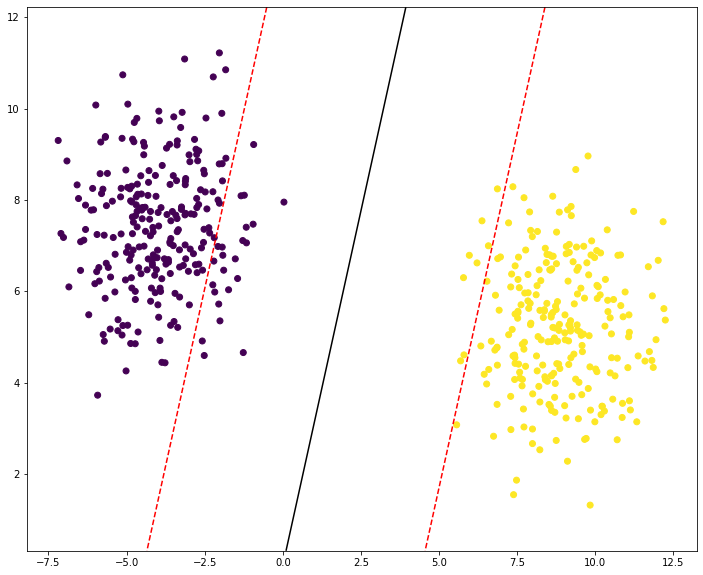

In [2043]:
fit()
draw_decision_boundary(X, y)

In [2044]:
np.count_nonzero(y == np.sign(decision_func(X))) / (y == np.sign(decision_func(X))).size

1.0